In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py


In [47]:
df = pd.read_csv('cars.csv')
df.head()
df.describe()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


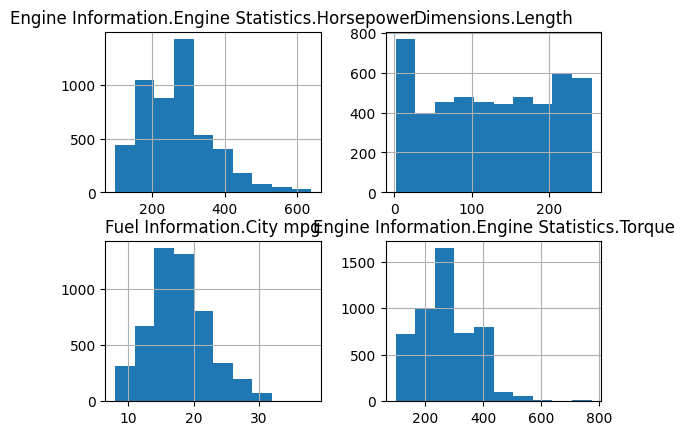

In [52]:
viz = df[['Engine Information.Engine Statistics.Horsepower','Dimensions.Length','Fuel Information.City mpg' ,'Engine Information.Engine Statistics.Torque']]
viz.hist()
plt.show()

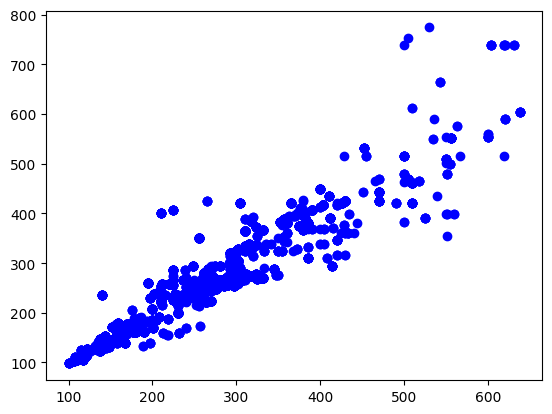

In [53]:
plt.scatter(np.array(viz['Engine Information.Engine Statistics.Horsepower']),np.array(viz['Engine Information.Engine Statistics.Torque']), color='blue')
plt.show()
#print(viz)

In [54]:
msk = np.random.rand(len(df)) < 0.8
train = viz[msk]
test = viz[~msk]

In [63]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Information.Engine Statistics.Horsepower']])
train_y = np.asanyarray(train[['Engine Information.Engine Statistics.Torque']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.98458297]]
Intercept:  [6.33724478]


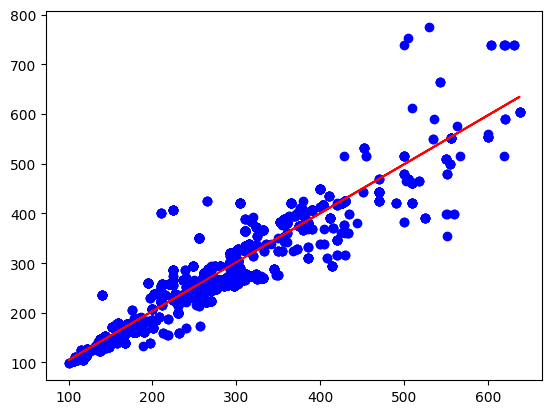

In [64]:
plt.scatter(np.array(train['Engine Information.Engine Statistics.Horsepower']),np.array(train['Engine Information.Engine Statistics.Torque']), color='blue')

plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


In [78]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Information.Engine Statistics.Horsepower']])
test_y = np.asanyarray(test[['Engine Information.Engine Statistics.Torque']])
test_y_ = regr.predict(test_x)
y= np.mean(test_y)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))


print("rmse :%.2f" %np.sqrt(np.mean((test_y_ - test_y) ** 2)))

print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.83
Residual sum of squares (MSE): 1209.13
rmse :34.77
R2-score: 0.88
